In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Importing dataset

In [2]:
df=pd.read_excel('table.xlsx')
df.head()

,player,cls,year,gp,mpg,ppg,fgm,fga,fg%,3pm,...,usg%,ppr,pps,ORtg,DRtg,eDiff,FIC,PER,draft_pos,drafted
0,Kris Humphries,Fr,2004,29,34.1,21.7,7.6,17.2,0.444,0.6,...,34.6,-7.0,1.3,105.6,101.8,3.8,376.6,24.3,14.0,first round
1,Emeka Okafor,Jr,2004,36,32.4,17.6,7.3,12.1,0.599,0.0,...,25.2,-5.0,1.5,115.5,83.3,32.2,663.5,28.5,2.0,first round
2,Devin Harris,Jr,2004,32,36.2,19.5,5.9,12.8,0.462,2.3,...,27.8,2.6,1.5,126.3,92.0,34.4,448.5,27.1,5.0,first round
3,Delonte West,Jr,2004,32,33.5,18.9,6.6,13.0,0.510,1.8,...,27.1,1.8,1.5,124.4,91.6,32.8,479.4,26.4,24.0,first round
4,Babby Araujo,Sr,2004,30,29.8,18.4,7.0,12.3,0.573,0.3,...,31.1,-8.4,1.5,115.8,99.3,16.5,437.6,37.4,8.0,first round


Filling null values in drafted column as undrafted

In [3]:
df['drafted'].isnull().value_counts()

True     2237
False     288
Name: drafted, dtype: int64

In [4]:
df['drafted'].fillna('undrafted',inplace=True)

In [5]:
df['drafted'].isnull().value_counts()

False    2525
Name: drafted, dtype: int64

In [6]:
df.head()

,player,cls,year,gp,mpg,ppg,fgm,fga,fg%,3pm,...,usg%,ppr,pps,ORtg,DRtg,eDiff,FIC,PER,draft_pos,drafted
0,Kris Humphries,Fr,2004,29,34.1,21.7,7.6,17.2,0.444,0.6,...,34.6,-7.0,1.3,105.6,101.8,3.8,376.6,24.3,14.0,first round
1,Emeka Okafor,Jr,2004,36,32.4,17.6,7.3,12.1,0.599,0.0,...,25.2,-5.0,1.5,115.5,83.3,32.2,663.5,28.5,2.0,first round
2,Devin Harris,Jr,2004,32,36.2,19.5,5.9,12.8,0.462,2.3,...,27.8,2.6,1.5,126.3,92.0,34.4,448.5,27.1,5.0,first round
3,Delonte West,Jr,2004,32,33.5,18.9,6.6,13.0,0.510,1.8,...,27.1,1.8,1.5,124.4,91.6,32.8,479.4,26.4,24.0,first round
4,Babby Araujo,Sr,2004,30,29.8,18.4,7.0,12.3,0.573,0.3,...,31.1,-8.4,1.5,115.8,99.3,16.5,437.6,37.4,8.0,first round


In [7]:
df.drop(['year','draft_pos'],axis='columns',inplace=True)
df

,player,cls,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,...,blk%,usg%,ppr,pps,ORtg,DRtg,eDiff,FIC,PER,drafted
0,Kris Humphries,Fr,29,34.1,21.7,7.6,17.2,0.444,0.6,1.7,...,3.6,34.6,-7.0,1.3,105.6,101.8,3.8,376.6,24.3,first round
1,Emeka Okafor,Jr,36,32.4,17.6,7.3,12.1,0.599,0.0,0.0,...,10.9,25.2,-5.0,1.5,115.5,83.3,32.2,663.5,28.5,first round
2,Devin Harris,Jr,32,36.2,19.5,5.9,12.8,0.462,2.3,6.3,...,0.4,27.8,2.6,1.5,126.3,92.0,34.4,448.5,27.1,first round
3,Delonte West,Jr,32,33.5,18.9,6.6,13.0,0.510,1.8,4.3,...,0.6,27.1,1.8,1.5,124.4,91.6,32.8,479.4,26.4,first round
4,Babby Araujo,Sr,30,29.8,18.4,7.0,12.3,0.573,0.3,1.0,...,3.4,31.1,-8.4,1.5,115.8,99.3,16.5,437.6,37.4,first round
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,Corey Kispert,Sr,32,31.8,18.6,6.5,12.3,0.529,2.8,6.5,...,1.4,22.7,-0.3,1.5,133.6,95.9,37.7,420.8,26.1,first round
2521,Jalen Hood-Schifino,Fr,32,33.1,13.5,5.3,12.6,0.417,1.2,3.5,...,0.8,25.8,-1.0,1.1,95.9,102.7,-6.9,226.8,13.7,first round
2522,Tyler Hansbrough,Sr,34,30.3,20.7,6.6,12.8,0.514,0.3,0.7,...,1.1,27.5,-3.5,1.6,130.2,96.2,34.0,486.8,28.2,first round
2523,Onyeka Okongwu,Fr,28,30.6,16.2,6.3,10.1,0.616,0.0,0.1,...,9.6,23.6,-4.2,1.6,123.1,89.0,34.2,438.4,31.2,first round


<AxesSubplot:xlabel='drafted', ylabel='PER'>

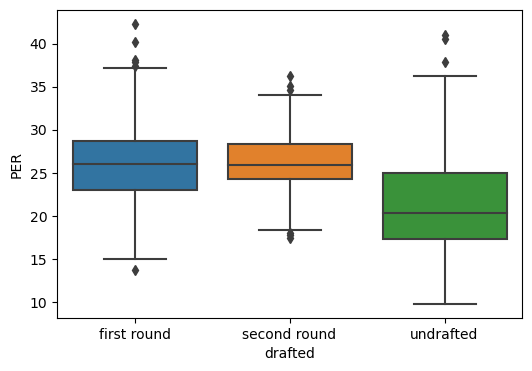

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='drafted',y='PER',order=['first round','second round','undrafted'])

<AxesSubplot:xlabel='cls'>

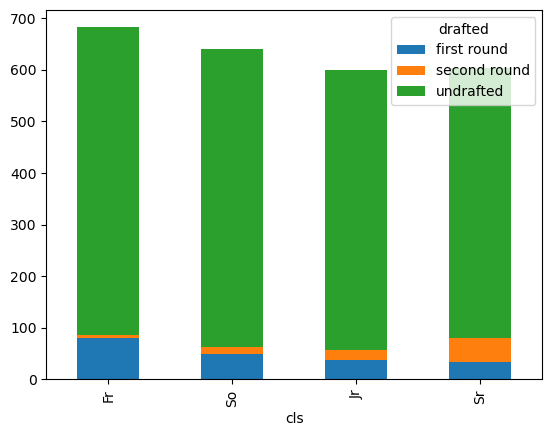

In [9]:
a=df[['cls','drafted']].groupby(by=['cls','drafted'])['cls'].count()
a.unstack().reindex(['Fr','So','Jr','Sr']).plot(kind='bar',stacked=True)

In [10]:
df.columns

Index(['player', 'cls', 'gp', 'mpg', 'ppg', 'fgm', 'fga', 'fg%', '3pm', '3pa',
       '3p%', 'ftm', 'fta', 'ft%', 'orb', 'drb', 'rpg', 'apg', 'spg', 'bpg',
       'tov', 'pf', 'TS%', 'eFG%', 'totalS%', 'orb%', 'drb%', 'trb%', 'ast%',
       'tov%', 'stl%', 'blk%', 'usg%', 'ppr', 'pps', 'ORtg', 'DRtg', 'eDiff',
       'FIC', 'PER', 'drafted'],
      dtype='object')

<AxesSubplot:xlabel='drafted', ylabel='PER'>

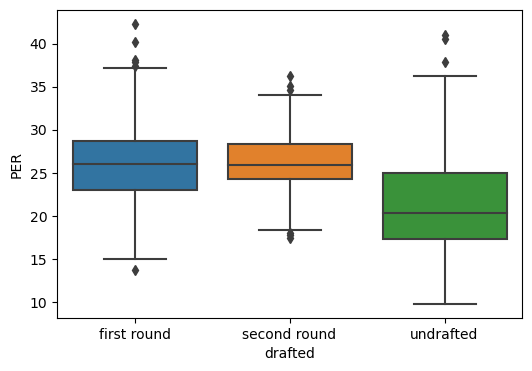

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='drafted',y='PER',order=['first round','second round','undrafted'])

In [13]:
df[['drafted','PER']].groupby('drafted')['PER'].mean()

drafted
first round     26.209000
second round    26.095455
undrafted       20.979079
Name: PER, dtype: float64

<AxesSubplot:xlabel='drafted', ylabel='FIC'>

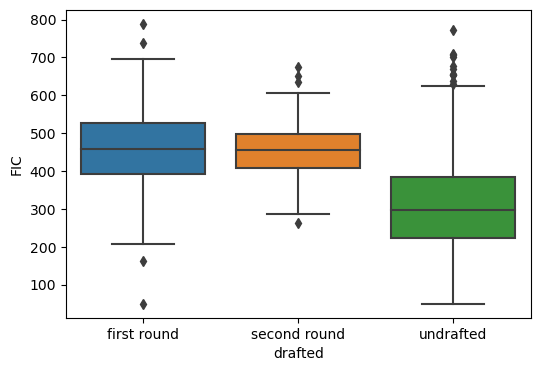

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='drafted',y='FIC',order=['first round','second round','undrafted'])

In [15]:
df[['drafted','FIC']].groupby('drafted')['FIC'].mean()

drafted
first round     460.913000
second round    454.069318
undrafted       306.749441
Name: FIC, dtype: float64

### Model

In [16]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

making class a dummy variable

In [17]:
df=pd.get_dummies(df,columns=['cls'])
df

,player,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,3p%,...,ORtg,DRtg,eDiff,FIC,PER,drafted,cls_Fr,cls_Jr,cls_So,cls_Sr
0,Kris Humphries,29,34.1,21.7,7.6,17.2,0.444,0.6,1.7,0.340,...,105.6,101.8,3.8,376.6,24.3,first round,1,0,0,0
1,Emeka Okafor,36,32.4,17.6,7.3,12.1,0.599,0.0,0.0,0.000,...,115.5,83.3,32.2,663.5,28.5,first round,0,1,0,0
2,Devin Harris,32,36.2,19.5,5.9,12.8,0.462,2.3,6.3,0.373,...,126.3,92.0,34.4,448.5,27.1,first round,0,1,0,0
3,Delonte West,32,33.5,18.9,6.6,13.0,0.510,1.8,4.3,0.412,...,124.4,91.6,32.8,479.4,26.4,first round,0,1,0,0
4,Babby Araujo,30,29.8,18.4,7.0,12.3,0.573,0.3,1.0,0.267,...,115.8,99.3,16.5,437.6,37.4,first round,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,Corey Kispert,32,31.8,18.6,6.5,12.3,0.529,2.8,6.5,0.440,...,133.6,95.9,37.7,420.8,26.1,first round,0,0,0,1
2521,Jalen Hood-Schifino,32,33.1,13.5,5.3,12.6,0.417,1.2,3.5,0.333,...,95.9,102.7,-6.9,226.8,13.7,first round,1,0,0,0
2522,Tyler Hansbrough,34,30.3,20.7,6.6,12.8,0.514,0.3,0.7,0.391,...,130.2,96.2,34.0,486.8,28.2,first round,0,0,0,1
2523,Onyeka Okongwu,28,30.6,16.2,6.3,10.1,0.616,0.0,0.1,0.250,...,123.1,89.0,34.2,438.4,31.2,first round,1,0,0,0


In [18]:
def f(x):
    if x=='undrafted':
        return 0
    else:  return 1

df['drafted']=df['drafted'].apply(lambda x: f(x))

dropping player names

In [19]:
df.drop('player',axis='columns',inplace=True)

defining x and y matrices

In [20]:
X=df.drop('drafted',axis='columns')
y=df['drafted']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, f1_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [23]:
y_encoded

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [24]:
pd.DataFrame(y_encoded).value_counts()

0    2237
1     288
dtype: int64

In [48]:
x_tr,x_tt,y_tr,y_tt=train_test_split(X,y,test_size=0.2,stratify=y)

In [26]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(x_tr.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(x_tr,y_tr,epochs=200,validation_split=0.3)

Epoch 1/200
45/45 [==============================] - 1s 9ms/step - loss: 0.8809 - accuracy: 0.8274 - val_loss: 0.6010 - val_accuracy: 0.7558
Epoch 2/200
45/45 [==============================] - 0s 5ms/step - loss: 0.4051 - accuracy: 0.8663 - val_loss: 0.3302 - val_accuracy: 0.8795
Epoch 3/200
45/45 [==============================] - 0s 4ms/step - loss: 0.3242 - accuracy: 0.8748 - val_loss: 0.3261 - val_accuracy: 0.8861
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 0.3108 - accuracy: 0.8706 - val_loss: 0.3058 - val_accuracy: 0.8845
Epoch 5/200
45/45 [==============================] - 0s 4ms/step - loss: 0.2789 - accuracy: 0.8868 - val_loss: 0.3101 - val_accuracy: 0.8680
Epoch 6/200
45/45 [==============================] - 0s 4ms/step - loss: 0.2897 - accuracy: 0.8876 - val_loss: 0.3999 - val_accuracy: 0.8795
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.8861 - val_loss: 0.4819 - val_accuracy: 0.7690
Epoch 8/200
4

Epoch 59/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2301 - accuracy: 0.9052 - val_loss: 0.3898 - val_accuracy: 0.8581
Epoch 60/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2449 - accuracy: 0.9017 - val_loss: 0.2706 - val_accuracy: 0.8845
Epoch 61/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2360 - accuracy: 0.8967 - val_loss: 0.2710 - val_accuracy: 0.8828
Epoch 62/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.9038 - val_loss: 0.2764 - val_accuracy: 0.8779
Epoch 63/200
45/45 [==============================] - 0s 4ms/step - loss: 0.2269 - accuracy: 0.9045 - val_loss: 0.2851 - val_accuracy: 0.8812
Epoch 64/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2301 - accuracy: 0.9038 - val_loss: 0.2902 - val_accuracy: 0.8713
Epoch 65/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.8967 - val_loss: 0.2757 - val_accuracy: 0.8911
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 0.2108 - accuracy: 0.9123 - val_loss: 0.2756 - val_accuracy: 0.8861
Epoch 117/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2148 - accuracy: 0.9109 - val_loss: 0.2773 - val_accuracy: 0.8779
Epoch 118/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9024 - val_loss: 0.3334 - val_accuracy: 0.8878
Epoch 119/200
45/45 [==============================] - 0s 4ms/step - loss: 0.2201 - accuracy: 0.9109 - val_loss: 0.3338 - val_accuracy: 0.8779
Epoch 120/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2222 - accuracy: 0.9095 - val_loss: 0.4463 - val_accuracy: 0.8845
Epoch 121/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2199 - accuracy: 0.9158 - val_loss: 0.2727 - val_accuracy: 0.8828
Epoch 122/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.9109 - val_loss: 0.3515 - val_accuracy: 0.8564
Epoch 123/200

45/45 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9151 - val_loss: 0.2661 - val_accuracy: 0.8828
Epoch 174/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.9095 - val_loss: 0.2633 - val_accuracy: 0.8845
Epoch 175/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2042 - accuracy: 0.9102 - val_loss: 0.2796 - val_accuracy: 0.8878
Epoch 176/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.9180 - val_loss: 0.2798 - val_accuracy: 0.8795
Epoch 177/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2125 - accuracy: 0.9102 - val_loss: 0.2988 - val_accuracy: 0.8845
Epoch 178/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.9074 - val_loss: 0.2986 - val_accuracy: 0.8746
Epoch 179/200
45/45 [==============================] - 0s 4ms/step - loss: 0.1968 - accuracy: 0.9194 - val_loss: 0.3528 - val_accuracy: 0.8614
Epoch 180/200

In [29]:
loss, accuracy = model.evaluate(x_tt,y_tt)
print(f'Acurácia do modelo: {accuracy}')

16/16 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 0.9030
Acurácia do modelo: 0.9029703140258789


In [30]:
y_pred=model.predict(x_tt)

16/16 [==============================] - 0s 3ms/step


In [31]:
x_tt['drafted']=y_tt

In [32]:
x_tt['drafted'].value_counts()

0    447
1     58
Name: drafted, dtype: int64

In [33]:
def binarize(y,thresh):
    yhat=[]
    for pred in y:
        if pred[1]>=thresh:
            yhat.append(1)
        else:
            yhat.append(0)
    return yhat

In [38]:
prediction=binarize(y_pred,0.4)

In [39]:
pd.DataFrame(prediction).value_counts()

0    447
1     58
dtype: int64

In [36]:
y_pred[:,1].mean()

0.12461849

In [40]:
f1_score(prediction,y_tt)

0.5689655172413793

In [41]:
df=pd.read_excel('table.xlsx')
df=pd.get_dummies(df,columns=['cls'])
df.head()

,player,year,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,...,DRtg,eDiff,FIC,PER,draft_pos,drafted,cls_Fr,cls_Jr,cls_So,cls_Sr
0,Kris Humphries,2004,29,34.1,21.7,7.6,17.2,0.444,0.6,1.7,...,101.8,3.8,376.6,24.3,14.0,first round,1,0,0,0
1,Emeka Okafor,2004,36,32.4,17.6,7.3,12.1,0.599,0.0,0.0,...,83.3,32.2,663.5,28.5,2.0,first round,0,1,0,0
2,Devin Harris,2004,32,36.2,19.5,5.9,12.8,0.462,2.3,6.3,...,92.0,34.4,448.5,27.1,5.0,first round,0,1,0,0
3,Delonte West,2004,32,33.5,18.9,6.6,13.0,0.510,1.8,4.3,...,91.6,32.8,479.4,26.4,24.0,first round,0,1,0,0
4,Babby Araujo,2004,30,29.8,18.4,7.0,12.3,0.573,0.3,1.0,...,99.3,16.5,437.6,37.4,8.0,first round,0,0,0,1


In [42]:
df.loc[df['player']=='Stephen Curry']

,player,year,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,...,DRtg,eDiff,FIC,PER,draft_pos,drafted,cls_Fr,cls_Jr,cls_So,cls_Sr
66,Stephen Curry,2009,34,33.7,28.6,9.2,20.2,0.454,3.8,9.9,...,88.3,34.5,599.6,35.5,7.0,first round,0,1,0,0
578,Stephen Curry,2007,34,30.9,21.5,7.1,15.4,0.463,3.6,8.8,...,91.6,29.6,433.6,26.9,NaN,NaN,1,0,0,0
680,Stephen Curry,2008,36,33.1,25.9,8.8,18.2,0.483,4.5,10.3,...,90.3,34.5,568.6,32.4,NaN,NaN,0,0,1,0


In [77]:
df.loc[df['player']=='Thurman Zimmerman']

,player,year,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,...,DRtg,eDiff,FIC,PER,draft_pos,drafted,cls_Fr,cls_Jr,cls_So,cls_Sr
222,Thurman Zimmerman,2003,31,31.8,16.0,5.4,10.6,0.506,1.0,2.9,...,94.7,20.5,351.5,21.9,NaN,NaN,1,0,0,0
342,Thurman Zimmerman,2004,29,33.4,18.8,6.1,12.0,0.513,0.6,2.2,...,93.0,24.1,403.1,26.2,NaN,NaN,0,0,1,0


In [79]:
a=df.loc[df['player']=='Thurman Zimmerman'].drop(columns=['player','year','draft_pos','drafted']).iloc[1]

In [80]:
model.predict([list(a)])

1/1 [==============================] - 0s 62ms/step


array([[0.86983603, 0.13016404]], dtype=float32)

In [75]:
df.loc[df['drafted'].isnull()]

,player,year,gp,mpg,ppg,fgm,fga,fg%,3pm,3pa,...,DRtg,eDiff,FIC,PER,draft_pos,drafted,cls_Fr,cls_Jr,cls_So,cls_Sr
218,Carmelo Anthony,2003,35,36.4,22.2,7.9,17.5,0.453,1.6,4.7,...,92.5,24.3,554.3,25.0,NaN,NaN,1,0,0,0
219,Kee-Kee Clark,2003,29,38.2,24.9,8.0,20.1,0.396,3.8,9.6,...,121.6,-12.5,321.1,24.5,NaN,NaN,1,0,0,0
220,Ike Diogu,2003,32,32.2,19.0,6.6,10.8,0.609,0.3,0.8,...,100.4,21.6,398.4,24.1,NaN,NaN,1,0,0,0
221,Johnny Hollingsworth,2003,28,35.7,17.4,5.7,11.2,0.506,0.8,2.0,...,108.5,11.2,322.8,22.4,NaN,NaN,1,0,0,0
222,Thurman Zimmerman,2003,31,31.8,16.0,5.4,10.6,0.506,1.0,2.9,...,94.7,20.5,351.5,21.9,NaN,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Nicholas Boyd,2023,38,23.8,8.9,3.2,7.2,0.449,1.8,4.5,...,95.4,25.2,294.9,18.4,NaN,NaN,0,0,1,0
2451,Jake Stephens,2023,24,32.2,22.0,7.5,13.7,0.552,2.1,5.2,...,95.5,33.3,487.9,36.2,NaN,NaN,0,0,0,1
2452,A.J. Smith,2024,29,32.1,16.2,6.0,13.3,0.453,1.2,3.4,...,107.7,-0.8,223.0,18.0,NaN,NaN,0,0,1,0
2453,Tyson Acuff,2024,27,37.9,21.7,8.1,18.7,0.433,1.8,6.2,...,111.5,-4.6,269.0,20.6,NaN,NaN,0,1,0,0
